# Análise de Dados de Saúde

Este projeto tem como objetivo analisar dados de pacientes para extrair insights importantes, como padrões de condições médicas, custos de internação e distribuição demográfica dos pacientes. A base de dados contém informações sobre internações, incluindo dados pessoais, médicos, financeiros e temporais.

O objetivo desta análise é responder a perguntas como:
- Quais são as condições médicas mais comuns?
- Como se distribui a idade dos pacientes?
- Existe alguma relação entre idade, condição médica e custo da internação?

## Introdução
Esta análise explora padrões em dados de internação hospitalar, focando em gerar informações úteis para convênios médicos. A análise traz insights sobre o perfil dos pacientes, prevalência de condições médicas, custo médio de internações e diferenças demográficas que podem ser relevantes para as operadoras de convênios.

## Escolha da biblioteca utilizada para lidar com os dados

Iniciamos o projeto escolhendo qual biblioteca para manipulação de dados será utilizada

In [4]:
import pandas as pd

basedados = pd.read_csv("basedadossaude.csv")

## Carregamento e Panorama dos Dados

Continuamos, agora com o carregamento da base de dados e exibindo as primeiras linhas para entender a estrutura do conjunto de dados. Isso permite identificar as colunas e os tipos de variáveis com que vamos trabalhar.

In [6]:
print("Primeiras linhas do DataFrame:")
display(basedados.head())

Primeiras linhas do DataFrame:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Norma Fisher,51,Female,AB+,Hypertension,2023-11-24,Susan Wagner,Taylor-Davis,Blue Cross,NaN,175,Urgent,2024-04-11,Aspirin,Inconclusive
1,Justin Gomez,58,Male,AB-,Obesity,2024-04-11,Thomas Moon,Cortez Group,Medicare,61651.5,352,Urgent,2024-07-21,Penicillin,Inconclusive
2,Cheryl Bradley,48,Male,AB-,Diabetes,2020-07-11,Yolanda Burns,Arnold-Mann,Humana,34210.5,376,Emergency,2023-04-01,Lisinopril,Inconclusive
3,Kyle Cruz,48,Female,B+,Asthma,2021-06-07,Mary Alvarez,Shelton and Sons,Aetna,5298.0,141,Observation,2021-07-28,Lisinopril,Abnormal
4,Stephanie Lawrence,71,Female,AB-,Obesity,2022-11-19,Brian Matthews,Bruce-Sanchez,Blue Cross,17352.0,212,Urgent,2023-01-21,Penicillin,Abnormal


# Passo 1 - Análise Exploratória Inicial (EDA)

## Descrevendo estatísticas básicas das colunas do tipo númericas

In [8]:
print("Estatísticas descritivas:")
display(basedados.describe())

Estatísticas descritivas:


,Age,Billing Amount,Room Number
count,200.000000,175.000000,200.000000
mean,52.855000,44652.400000,260.370000
std,21.335887,28010.386446,86.179508
min,18.000000,1627.500000,104.000000
25%,34.000000,21284.250000,188.750000
50%,51.000000,40256.000000,271.000000
75%,71.000000,62148.000000,337.250000
max,90.000000,178488.000000,400.000000


## Verificação dos tipos de dados

In [8]:
print("Tipos de dados das colunas:")
print(basedados.dtypes)

Tipos de dados das colunas:
Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


## Verificação de valores ausentes nas colunas

In [14]:
print("Valores ausentes em cada coluna:")
print(basedados.isnull().sum())

Valores ausentes em cada coluna:
Name                  5
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


# Passo 4 - Limpeza de dados

## Tratamento de valores ausentes

In [16]:
basedados['Billing Amount'] = basedados['Billing Amount'].fillna(basedados['Billing Amount'].mean())

## Conversão de colunas de data para o tipo datetime

In [18]:
basedados['Date of Admission'] = pd.to_datetime(basedados['Date of Admission'], errors='coerce')
basedados['Discharge Date'] = pd.to_datetime(basedados['Discharge Date'], errors='coerce')

basedados.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Norma Fisher,51,Female,AB+,Hypertension,2023-11-24,Susan Wagner,Taylor-Davis,Blue Cross,44652.4,175,Urgent,2024-04-11,Aspirin,Inconclusive
1,Justin Gomez,58,Male,AB-,Obesity,2024-04-11,Thomas Moon,Cortez Group,Medicare,61651.5,352,Urgent,2024-07-21,Penicillin,Inconclusive
2,Cheryl Bradley,48,Male,AB-,Diabetes,2020-07-11,Yolanda Burns,Arnold-Mann,Humana,34210.5,376,Emergency,2023-04-01,Lisinopril,Inconclusive
3,Kyle Cruz,48,Female,B+,Asthma,2021-06-07,Mary Alvarez,Shelton and Sons,Aetna,5298.0,141,Observation,2021-07-28,Lisinopril,Abnormal
4,Stephanie Lawrence,71,Female,AB-,Obesity,2022-11-19,Brian Matthews,Bruce-Sanchez,Blue Cross,17352.0,212,Urgent,2023-01-21,Penicillin,Abnormal


## Remoção de dados duplicados

In [20]:
basedados.drop_duplicates(inplace=True)

basedados.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Norma Fisher,51,Female,AB+,Hypertension,2023-11-24,Susan Wagner,Taylor-Davis,Blue Cross,44652.4,175,Urgent,2024-04-11,Aspirin,Inconclusive
1,Justin Gomez,58,Male,AB-,Obesity,2024-04-11,Thomas Moon,Cortez Group,Medicare,61651.5,352,Urgent,2024-07-21,Penicillin,Inconclusive
2,Cheryl Bradley,48,Male,AB-,Diabetes,2020-07-11,Yolanda Burns,Arnold-Mann,Humana,34210.5,376,Emergency,2023-04-01,Lisinopril,Inconclusive
3,Kyle Cruz,48,Female,B+,Asthma,2021-06-07,Mary Alvarez,Shelton and Sons,Aetna,5298.0,141,Observation,2021-07-28,Lisinopril,Abnormal
4,Stephanie Lawrence,71,Female,AB-,Obesity,2022-11-19,Brian Matthews,Bruce-Sanchez,Blue Cross,17352.0,212,Urgent,2023-01-21,Penicillin,Abnormal


## Correção de erros de formatação nas colunas de CATEGORIAS

In [22]:
basedados['Gender'] = basedados['Gender'].str.strip()  # Remove espaços em branco
basedados['Medical Condition'] = basedados['Medical Condition'].str.strip()

basedados.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Norma Fisher,51,Female,AB+,Hypertension,2023-11-24,Susan Wagner,Taylor-Davis,Blue Cross,44652.4,175,Urgent,2024-04-11,Aspirin,Inconclusive
1,Justin Gomez,58,Male,AB-,Obesity,2024-04-11,Thomas Moon,Cortez Group,Medicare,61651.5,352,Urgent,2024-07-21,Penicillin,Inconclusive
2,Cheryl Bradley,48,Male,AB-,Diabetes,2020-07-11,Yolanda Burns,Arnold-Mann,Humana,34210.5,376,Emergency,2023-04-01,Lisinopril,Inconclusive
3,Kyle Cruz,48,Female,B+,Asthma,2021-06-07,Mary Alvarez,Shelton and Sons,Aetna,5298.0,141,Observation,2021-07-28,Lisinopril,Abnormal
4,Stephanie Lawrence,71,Female,AB-,Obesity,2022-11-19,Brian Matthews,Bruce-Sanchez,Blue Cross,17352.0,212,Urgent,2023-01-21,Penicillin,Abnormal


# Passo 5 - Análise de dados

Como se trata de uma base de dados (DataFrame) de dados médicos, especificamente sobre dados a cerca de valores cobrados por diferentes convênios médicos, vamos começar com:

## Distribuição de idades

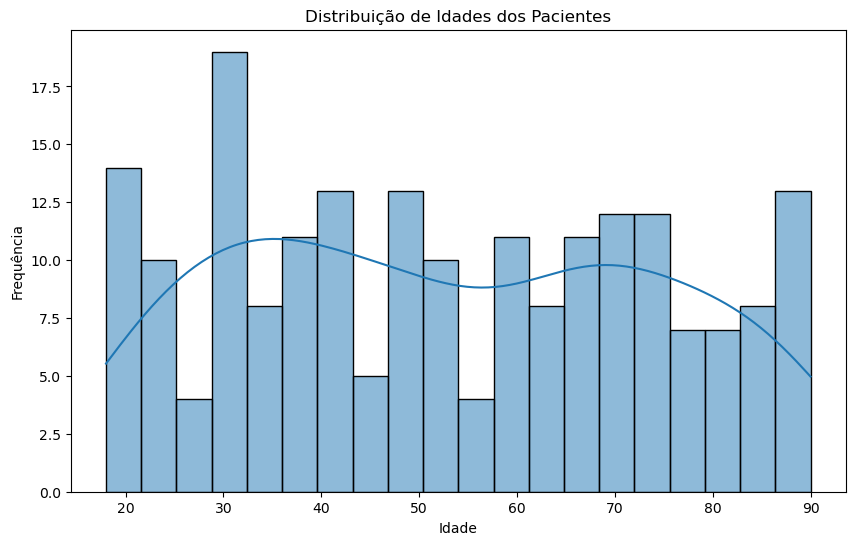

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(basedados['Age'], bins=20, kde=True)
plt.title('Distribuição de Idades dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

## Contagem das condições médicas

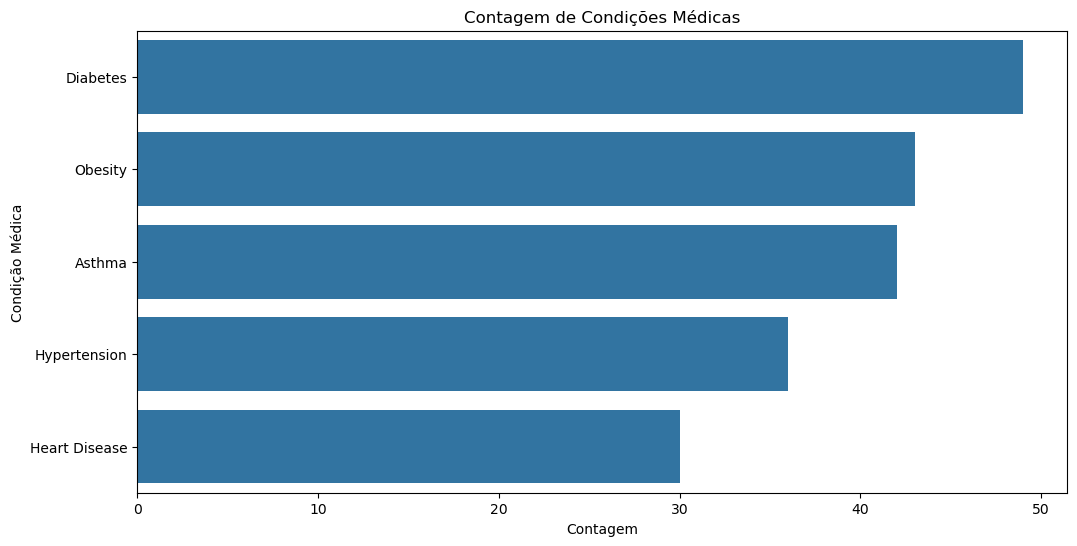

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(data=basedados, y='Medical Condition', order=basedados['Medical Condition'].value_counts().index)
plt.title('Contagem de Condições Médicas')
plt.xlabel('Contagem')
plt.ylabel('Condição Médica')
plt.show()

## Análise de doenças mais recorrentes em cada faixa etária

<Figure size 1200x800 with 0 Axes>

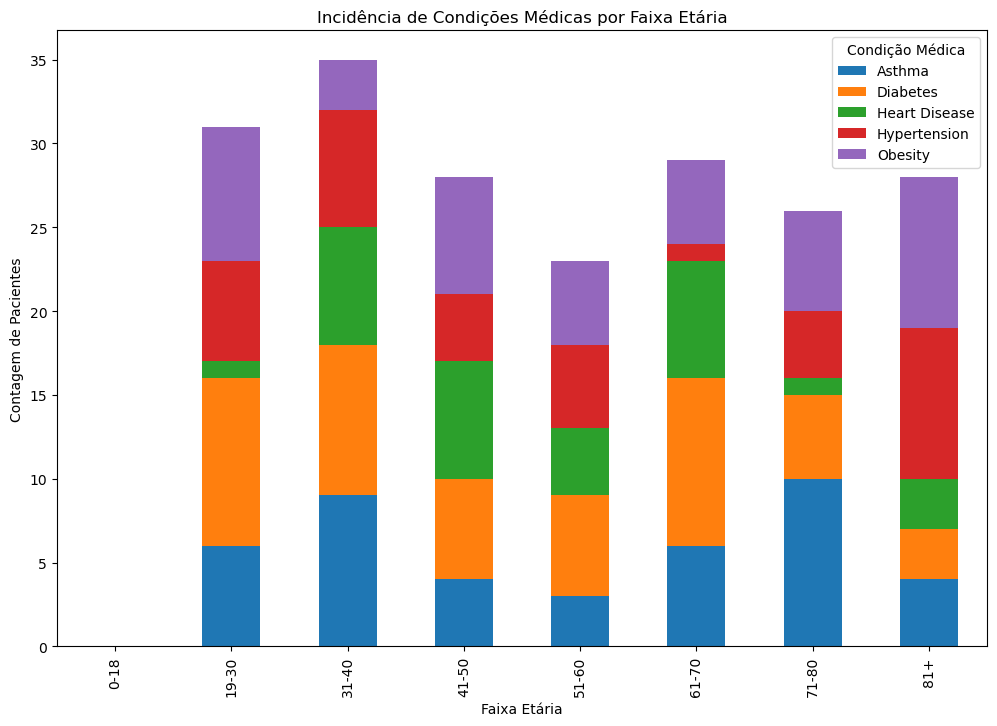

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

faixas_etarias = [0, 18, 30, 40, 50, 60, 70, 80, 100]
rotulos = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
basedados['Age Group'] = pd.cut(basedados['Age'], bins=faixas_etarias, labels=rotulos, right=False)

condicao_idade = basedados.groupby(['Age Group', 'Medical Condition'], observed=False).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
condicao_idade.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Incidência de Condições Médicas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem de Pacientes')
plt.legend(title='Condição Médica')
plt.show()

## Correlação entre Idade e Custo da Internação

Calculamos a correlação entre a idade dos pacientes e o custo da internação para verificar se pacientes de certas faixas etárias têm maior custo médio de internação. O resultado dessa análise pode ajudar em políticas de seguro e gerenciamento de custos.

<Figure size 1200x800 with 0 Axes>

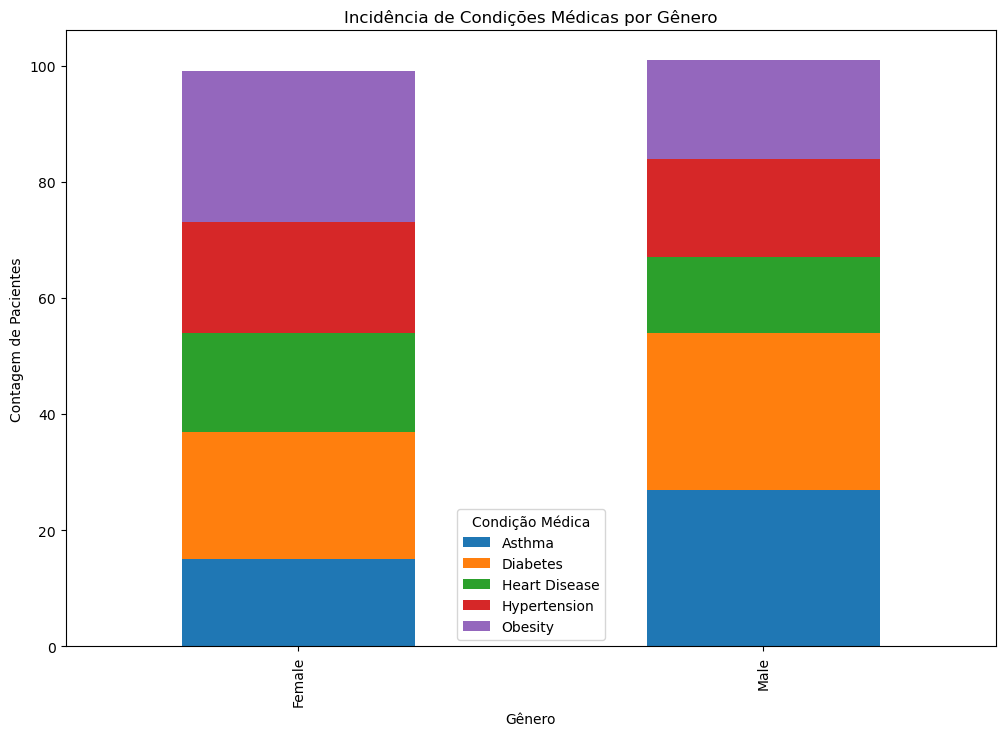

In [38]:
contagem_condicao_genero = basedados.groupby(['Gender', 'Medical Condition']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
contagem_condicao_genero.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Incidência de Condições Médicas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem de Pacientes')
plt.legend(title='Condição Médica')
plt.show()

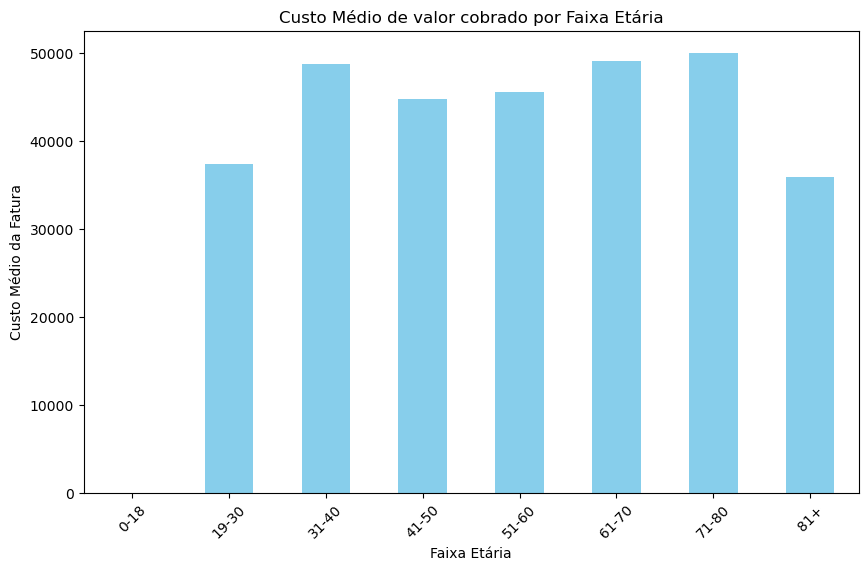

In [36]:
custos_idade = basedados.groupby('Age Group', observed=False)['Billing Amount'].mean()

plt.figure(figsize=(10, 6))
custos_idade.plot(kind='bar', color='skyblue')
plt.title('Custo Médio de valor cobrado por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Custo Médio da Fatura')
plt.xticks(rotation=45)
plt.show()

## Análise das doenças mais recorrentes, por genêro

# Apuração de possíveis fraudes/anomalias

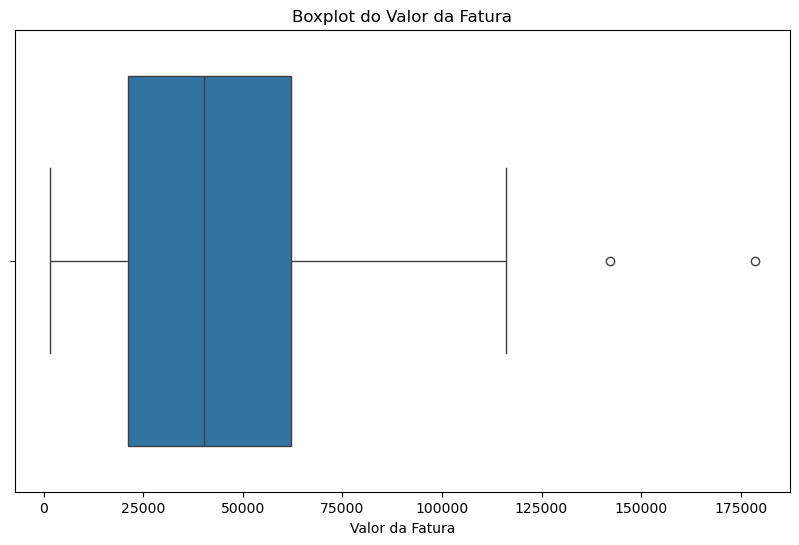

Condições médicas com custos extremamente altos:


,Medical Condition,Billing Amount
34,Asthma,178488.0
121,Heart Disease,142072.0


In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=basedados['Billing Amount'])
plt.title('Boxplot do Valor da Fatura')
plt.xlabel('Valor da Fatura')
plt.show()

custos_altos = basedados[basedados['Billing Amount'] > basedados['Billing Amount'].mean() + 3 * basedados['Billing Amount'].std()]
print("Condições médicas com custos extremamente altos:")
display(custos_altos[['Medical Condition', 'Billing Amount']])

## Conclusão

A análise dos dados de saúde revelou informações valiosas para convênios médicos, ajudando a direcionar estratégias de atendimento e desenvolvimento de planos. Abaixo estão os principais insights:

### Faixa Etária dos Pacientes
Pacientes com 30 anos representam a maior parte dos clientes em potencial, o que sugere um público-alvo com grande adesão a planos de saúde. Isso pode orientar os convênios a desenvolver pacotes ou planos específicos para essa faixa etária.

### Contagem Total das Condições Médicas (Doenças)
Diabetes é a condição médica mais comum entre os pacientes analisados. Esse dado é relevante para que convênios se preparem para atender um volume significativo de pacientes diabéticos, ajustando a oferta de tratamentos e recursos.

### Contagem das Condições Médicas por Faixa Etária
- Há maior incidência de diabetes em pacientes de 19-30 e 61-70 anos.
- Asma é mais incidente em pacientes de 31-40 e 71-80 anos.
- Hipertensão é menos comum entre pacientes de 61-70 anos.
- Problemas cardíacos são menos comuns em pacientes de 19-30 e 71-80 anos.
- A obesidade é comum em várias faixas etárias, exceto entre 31-40 anos.

Essas informações auxiliam convênios a se prepararem para os quadros clínicos mais prováveis em diferentes faixas etárias, ajudando na previsão de custos e no direcionamento de recursos.

### Contagem das Condições Médicas por Gênero
Obesidade, hipertensão e problemas cardíacos são consideravelmente mais incidentes em homens, enquanto diabetes e asma têm maior prevalência em mulheres. Isso sugere que convênios devem estar preparados para maiores custos relacionados a essas condições, dependendo do gênero do paciente.

### Custo Médio de Internação por Faixa Etária
Pacientes com 81 anos ou mais apresentaram o menor custo médio de internação, seguidos pela faixa etária de 19-30 anos. Em contrapartida, os pacientes de 71-80 e 61-70 anos apresentaram os maiores custos. Esse dado é relevante para estimar os custos de internação e ajustar os planos oferecidos conforme as faixas etárias.

### Identificação de Outliers nas Faturas
Foram detectadas anomalias nos valores das faturas para os pacientes de ID 34 e ID 121, com valores significativamente acima da média. Identificar outliers permite que convênios verifiquem possíveis erros de faturamento ou casos que exijam análise adicional.

### Dados Complementares
Foi observado que haviam dados nulos na base, com 5 nomes e 25 valores de faturas ausentes.

Esses insights apoiam o planejamento de pacotes direcionados e a previsão de custos médicos com base nas condições mais comuns e nas características demográficas observadas.